# Cross-Validation Exercises

In [158]:
!wget https://github.com/shegenbart/Jupyter-Exercises/raw/main/data/banknote.pickle -P ../data
!wget https://github.com/shegenbart/Jupyter-Exercises/raw/main/data/banknote_noisy.pickle -P ../data
    
    
import pickle
import numpy as np

from dataclasses import dataclass

@dataclass
class BanknotesDataset:
    Description: str
    Attributes: list()
    Targets: list()
    X: np.array
    Y: np.array
        
def load_dataset(filename):
    with open(filename, 'rb') as fd:
        dataset = pickle.load(fd)
    return dataset

dataset = load_dataset('../data/banknote_noisy.pickle')

--2023-01-10 10:00:05--  https://github.com/shegenbart/Jupyter-Exercises/raw/main/data/banknote.pickle
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/shegenbart/Jupyter-Exercises/main/data/banknote.pickle [following]
--2023-01-10 10:00:05--  https://raw.githubusercontent.com/shegenbart/Jupyter-Exercises/main/data/banknote.pickle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50196 (49K) [application/octet-stream]
Saving to: ‘../data/banknote.pickle.2’

banknote.pickle.2   100%[===================>]  49.02K  --.-KB/s    in 0.003s  

2023-01-10 10:00:05 (14.3 MB/s) - ‘../data/banknote.pickle.2’ 

In [159]:
print(dataset.Description)

Noisy Version! Data were extracted from images that were taken
from genuine and forged banknote-like specimens.
For digitization, an industrial camera usually
used for print inspection was used. The final
images have 400x 400 pixels. Due to the object
lens and distance to the investigated object
gray-scale pictures with a resolution of about
660 dpi were gained. Wavelet Transform tool were
used to extract features from images.


## Exercise 1:

In this exercise we will study the effect of training a ML model using the training data. Because all our methods aim to find a model that works as good as possible on our training data, we often get an unrealistically high score on our training data. 

* Inspect the banknote-fraud dataset stored in ```dataset```.
* Train a decision tree classifier and predict the accuracy of all data using the ```accuracy_score()``` function. 
* Discuss the results, is it realistic?

In [160]:
# print(dataset)
print(f"Attributes: {dataset.Attributes}")
print(f"Targets: {dataset.Targets}")
print(f"X: {dataset.X}")
print(f"Y: {dataset.Y}")
print(f"Size: {len(dataset.X)}")

Attributes: ['wt-variance', 'wt-skewness', 'wt-curtosis', 'entropy']
Targets: ['genuine', 'fake']
X: [[  2.39209689   7.37776213  -1.30968355  -1.90920075]
 [  4.98797126   9.20928261   1.17146499   0.27867013]
 [  3.06912727   0.09055932   1.10316372  -0.60482555]
 ...
 [ -6.80995912 -11.85842326  14.95026107  -2.33351752]
 [ -4.94918715 -12.05890416  10.94323167  -1.74622386]
 [ -5.47175965   0.34704002   1.31815441  -0.18213108]]
Y: [0 0 0 ... 1 1 1]
Size: 1372


## Dataset Inspection
#### Attributes:
* wt-variance
* wt-skewness
* wt-curtosis
* entropy

#### Targets:
* genuinie
* fake

In [161]:
# Decision tree classifier
from sklearn import tree
from sklearn.metrics import accuracy_score

X = dataset.X
Y = dataset.Y
clf = tree.DecisionTreeClassifier()
clf.fit(X, Y)
res = clf.predict(X)
print(f"Accuracy score: {accuracy_score(res, Y)} (Train equals Test)")

Accuracy score: 1.0 (Train equals Test)


## Discussion
The results of the first decision tree classifier (Train equals Test) is not realistic, as the tree is trained and tested with the same data.

## Exercise 2:

In the previous exercise we saw that using the same data to evaluate a model that was used to optimize a method gives unrealistically high scores. Instead we have to hold back on some of the data during training and use this held-back data to perform the evaluation. 

* Create a test-train split of the banknote-fraud dataset (```dataset```) using the ```train_test_split()``` function from sklearn. 
* Train another decision tree on the *train* portion and evaluate it's accuracy (```accuracy_score()```) on the *test* portion. 

In [162]:
# Train-Test split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, Y_train)
res = clf.predict(X_test)
print(f"Accuracy score: {accuracy_score(res, Y_test)} (Train-Test split)")

Accuracy score: 0.8519417475728155 (Train-Test split)


## Exercise 3:

There is a nice trick to know to check if your code or your validation are somewhat flawed. Shuffle your labels randomly, then train your classifier with the suffled labels. What performance would you expect from a *fair* classifier? 

* Shuffle your training labels (```np.random.shuffle()```)
* Train a classifier, what accuracy would you expect?
* Validate on your test set. 

In [163]:
# Suffle labels
import numpy as np

np.random.shuffle(Y_train)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, Y_train)
res = clf.predict(X_test)
print(f"Accuracy score: {accuracy_score(res, Y_test)} (Shuffled)")

Accuracy score: 0.4830097087378641 (Shuffled)


### Exercise 4:

Let's use scikit-learn's implementation of cross-cross_validate (see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html). 

* Perform cross-validation using the ```cross_validate()``` function in a 10-fold cross-validation.  
* Report the mean and standard deviation of your results. 
* Experiment with the number of folds (in k-fold cross validation), how does it influence your mean and standard deviation?

In [164]:
# Cross-Validation
from sklearn.model_selection import cross_validate

clf = tree.DecisionTreeClassifier()
cv_results = cross_validate(clf, X=X, y=Y, cv=10)
print(f"Mean: {np.mean(cv_results['test_score'])}")
print(f"Standard deviation: {np.std(cv_results['test_score'])}")

Mean: 0.8359621284248387
Standard deviation: 0.024913209565148867


### Exercise 5:

* Train a decision tree classifier for the banknotes dataset (it should already be loaded in the ```dataset``` variable), compute and visualize the confusion matrix.
* Compute the accuracy, specificity, recall and precision in a 10 fold cross-validation and report the mean and standard deviation of each. 

**Hints:** 

1. Implement each measure as a function with a prototype like this:
```python 
def accuracy(Y_pred, Y_real): 
        pass
```

2. Use a confusion matrix to compute the true-positives, true-negatives, false-positives and false-positives.
3. ```cross_validate()``` accepts a parameter ```scoring```which accepts a dictionary of callables, use **lambdas** to  define your individual scorers. 

Confusion Matrix:
[[209  30]
 [ 22 151]]


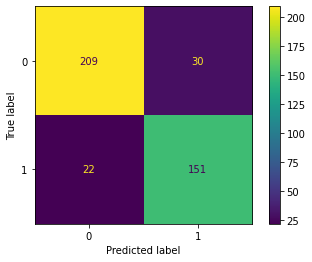

In [165]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, Y_train)
res = clf.predict(X_test)
print(f"Confusion Matrix:\n{confusion_matrix(res, Y_test)}")
ConfusionMatrixDisplay.from_predictions(res, Y_test);

In [166]:
# Evaluation metrics implementation
def accuracy(Y_pred, Y_real):
  pred = predictions(Y_pred, Y_real)
  return (pred['tp'] + pred['tn']) / (pred['tp'] + pred['tn'] + pred['fp'] + pred['fn'])

def specificity(Y_pred, Y_real):
  pred = predictions(Y_pred, Y_real)
  return pred['tn'] / (pred['tn'] + pred['fp'])

def sensitivity(Y_pred, Y_real):
  pred = predictions(Y_pred, Y_real)
  return pred['tp'] / (pred['tp'] + pred['fn'])

def precision(Y_pred, Y_real):
  pred = predictions(Y_pred, Y_real)
  return pred['tp'] / (pred['tp'] + pred['fp'])

def predictions(Y_pred, Y_real):
  cf = confusion_matrix(Y_pred, Y_real)
  predictions = dict()
  predictions['tp'] = cf[1][1]
  predictions['fp'] = cf[0][1]
  predictions['fn'] = cf[0][0]
  predictions['tn'] = cf[1][0]
  return predictions

In [167]:
print(f"Accuracy: {accuracy(res, Y_test)}")
print(f"Specificity: {specificity(res, Y_test)}")
print(f"Sensitivity: {sensitivity(res, Y_test)}")
print(f"Precision: {precision(res, Y_test)}")

Accuracy: 0.4199029126213592
Specificity: 0.4230769230769231
Sensitivity: 0.41944444444444445
Precision: 0.8342541436464088


In [168]:
# Cross-Validation
clf = tree.DecisionTreeClassifier()
scorers = dict()
scorers['accuracy'] = lambda clf, X,Y : accuracy(clf.predict(X), Y)
scorers['specificity'] = lambda clf, X,Y : specificity(clf.predict(X), Y)
scorers['sensitivity'] = lambda clf, X,Y : sensitivity(clf.predict(X), Y)
scorers['precision'] = lambda clf, X,Y : precision(clf.predict(X), Y)

cv_results = cross_validate(clf, X=X, y=Y, cv=10, scoring=scorers)

print(f"Mean accuracy: {np.mean(cv_results['test_accuracy'])}")
print(f"Standard deviation accuracy: {np.std(cv_results['test_accuracy'])}\n")
print(f"Mean specificity: {np.mean(cv_results['test_specificity'])}")
print(f"Standard deviation specificity: {np.std(cv_results['test_specificity'])}\n")
print(f"Mean sensitivity: {np.mean(cv_results['test_sensitivity'])}")
print(f"Standard deviation sensitivity: {np.std(cv_results['test_sensitivity'])}\n")
print(f"Mean precision: {np.mean(cv_results['test_precision'])}")
print(f"Standard deviation precision: {np.std(cv_results['test_precision'])}\n")

Mean accuracy: 0.44384851369935474
Standard deviation accuracy: 0.04151382604620878

Mean specificity: 0.4944564018495803
Standard deviation specificity: 0.12479440446874744

Mean sensitivity: 0.43300441171019094
Standard deviation sensitivity: 0.024277354225888836

Mean precision: 0.8081967213114755
Standard deviation precision: 0.0486584330480519

